# Assignment 9
## Due June 26th
### names:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import expon
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.linalg import eigh
from sklearn.neighbors import kneighbors_graph as kngraph
from sklearn.neighbors import NearestNeighbors as nn
from sklearn.utils.graph_shortest_path import graph_shortest_path as gsp


np.random.seed(42)

## Exercise 1

In [2]:
X, y = load_breast_cancer(return_X_y=True)
shuffled_idx = np.random.permutation(len(X))
X, y = X[shuffled_idx], y[shuffled_idx]
len_test = len(X) // 3 * 2
X_train, X_test = X[:len_test], X[len_test:]
y_train, y_test = y[:len_test], y[len_test:]

In [3]:
parameters = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

In [4]:
param_dist = {'C': expon(), 'gamma': expon()}

In [17]:
# perform GridSearch 
svc = SVC(kernel = 'rbf')
clf = GridSearchCV(svc, param_grid = parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.01}

### The best C seems to be $C = 10$.

In [18]:
# perform RandomizedSearch with 100 iterations
clf = RandomizedSearchCV(svc, param_distributions = param_dist, n_iter=100)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.8405347770953121, 'gamma': 0.8578439510282166}

### The best C seems to be $C \approx 0.84$ for 100 iterations.

In [19]:
# perform RandomizedSearch with 1000 iterations
clf = RandomizedSearchCV(svc, param_distributions = param_dist, n_iter=1000)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.38211993255389654, 'gamma': 0.0001347020764026737}

### The best C seems to be $C \approx 0.38$ for 1000 iterations.

## Exercise 2

### a)

In [8]:
def MDS(D, d):

    # Number of points  
    n = len(D)

     
    # matrix S
    S = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            S[i][j] = 0.5*(D[1][i]**2 + D[1][j]**2 - D[i][j]**2)
    
   
    #eigendecomposition
    eigenvalues, eigenvectors = eigh(S)
    
    # largest d 
    V_d = eigenvectors[:,-d:] 
    Val_d = eigenvalues[-d:]
    diag = np.diag(Val_d)
    X = np.dot(V_d, np.sqrt(diag))
 
    return X

### b)

In [10]:
eurocity_dataframe = pd.read_csv('eurodist.csv', index_col=0, header=0)
eurocity_dataframe

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
Cologne,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
Geneva,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
Hamburg,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


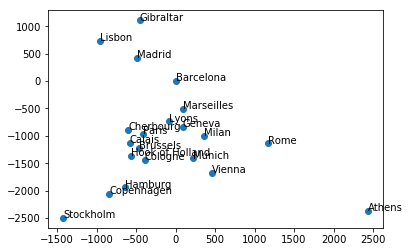

In [13]:
embedded_X = np.squeeze(MDS(eurocity_dataframe.as_matrix(), 2))
plt.scatter(embedded_X[:,0],embedded_X[:,1])
# name of city added
for j in range(len(embedded_X)):
    plt.annotate(eurocity_dataframe.columns[j],xy=embedded_X[j])

### c)


In [29]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).as_matrix()
y = train_df['Label'].as_matrix()
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

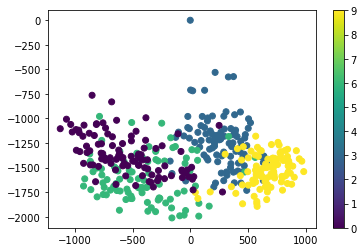

In [30]:
distance = euclidean_distances(X)
USPS = MDS(distance,2)
plt.scatter(USPS[:,0], USPS[:,1], c = y)
plt.colorbar()

# Exercise 3)

### a)

In [35]:
# we didn't chose to work with the networkx package, since it was too complex for us to understand 

def isomap(D, k, d):
    k_nearest = nn(k).fit(D)
    ids, shortest_distances = k_nearest.kneighbors(D)
    graph = kngraph(k_nearest, k, "distance")
    distances = gsp(graph, "D")
    embedding = MDS(shortest_distances, d)
    
    return embedding 


### b)

In [36]:
D = euclidean_distances(X)
result = isomap(D, 5, 2)
plt.scatter(result[:,0], result[:,1], c = y)
plt.colorbar()

TypeError: an integer is required